# Calculate Bootstrap Confidence Intervals For Machine Learning Results 
https://machinelearningmastery.com/calculate-bootstrap-confidence-intervals-machine-learning-results-python/

# Bootstrap Confidence Intervals

# 1. Calculate a Population of Statistics

# Bootstrap Model Performance

# Calculate Classification Accuracy Confidence Interval

0.6903765690376569
0.6873661670235546
0.7111597374179431
0.6716101694915254
0.6630196936542669
0.6390658174097664
0.7004405286343612
0.7109207708779444
0.6956521739130435
0.6878980891719745
0.7346072186836518
0.6829787234042554
0.6602564102564102
0.6666666666666666
0.6595744680851063
0.6795698924731183
0.6883116883116883
0.6515151515151515
0.6631578947368421
0.7190265486725663
0.6924731182795699
0.7054945054945055
0.6872340425531915
0.6888412017167382
0.6788008565310493
0.7121535181236673
0.6919739696312365
0.7142857142857143
0.6916488222698073
0.7014925373134329
0.703862660944206
0.7021276595744681
0.715203426124197
0.6708860759493671
0.7194092827004219
0.6687898089171974
0.6952789699570815
0.6827731092436975
0.688034188034188
0.7047413793103449
0.6666666666666666
0.6701902748414377
0.7124463519313304
0.6851063829787234
0.7075268817204301
0.6894273127753304
0.7115384615384616
0.6931330472103004
0.6539278131634819
0.6924731182795699
0.6709677419354839
0.6817204301075269
0.7494553376906

0.7408993576017131
0.6371490280777538
0.7004405286343612
0.7212765957446808
0.6702355460385439
0.6993603411513859
0.6885964912280702
0.6876355748373102
0.674468085106383
0.6993736951983298
0.6955602536997886
0.7071583514099783
0.6565874730021598
0.6623655913978495
0.6989247311827957
0.6934782608695652
0.6974248927038627
0.6717391304347826
0.6916299559471366
0.6784922394678492
0.7170212765957447
0.7051282051282052
0.6976241900647948
0.6967741935483871
0.6751054852320675
0.6939655172413793
0.6757894736842105
0.6687763713080169
0.6594360086767896
0.6514522821576764
0.7047413793103449
0.6320346320346321
0.6806167400881057
0.6813186813186813
0.7055084745762712
0.712742980561555
0.6419491525423728
0.7032258064516129
0.6746724890829694
0.7089715536105032
0.668859649122807
0.6787234042553192
0.6703786191536748
0.7082452431289641
0.7078891257995735
0.6787234042553192
0.7142857142857143
0.6864406779661016
0.7303609341825902
0.6895074946466809
0.6976241900647948
0.6762114537444934
0.6702819956616

0.66
0.7031578947368421
0.6956521739130435
0.712742980561555
0.6695278969957081
0.7313432835820896
0.698237885462555
0.6540084388185654
0.6995708154506438
0.6853448275862069
0.7219827586206896
0.6573875802997858
0.6826722338204593
0.7066381156316917
0.6815286624203821
0.6937901498929336
0.6673773987206824
0.6717724288840262
0.673036093418259
0.6997885835095138
0.6751054852320675
0.7093275488069414
0.684322033898305
0.67170626349892
0.6528384279475983
0.6443965517241379
0.6752136752136753
0.7032258064516129
0.6804347826086956
0.7021739130434783
0.7030567685589519
0.690631808278867
0.6645161290322581
0.6896551724137931
0.7017167381974249
0.6703296703296703
0.7212765957446808
0.6980728051391863
0.6963123644251626
0.6846652267818575
0.7094017094017094
0.6812227074235808
0.7010752688172043
0.6561181434599156
0.6965065502183406
0.7537796976241901
0.7120535714285714
0.6852248394004282
0.6936542669584245
0.6542669584245077
0.7081545064377682
0.7029914529914529
0.6357758620689655
0.657505285412

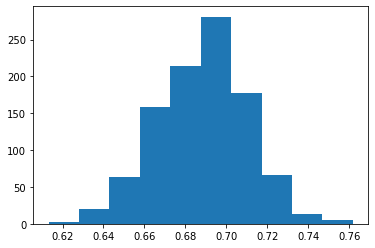

95.0 confidence interval 64.4% and 72.9%


In [3]:
import numpy
import pandas as pd
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# load dataset
data = pd.read_csv('pima-indians-diabetes.csv') #, header=None
values = data.values
# configure bootstrap
n_iterations = 1000
n_size = int(len(data) * 0.50)
# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
	train = resample(values, n_samples=n_size)
	test = numpy.array([x for x in values if x.tolist() not in train.tolist()])
	# fit model
	model = DecisionTreeClassifier()
	model.fit(train[:,:-1], train[:,-1])
	# evaluate model
	predictions = model.predict(test[:,:-1])
	score = accuracy_score(test[:,-1], predictions)
	print(score)
	stats.append(score)
# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, numpy.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, numpy.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))